## Continuous case (Ambiguity Calculation)

For continuous case ambiguty calculation we are calculating the overlap region beteween the hypercube of feature space of different classes.

$\large mean(\frac{A_{inter1}}{A_{class1}}, \frac{A_{inter2}}{A_{class2}}....) $.

$A_{inter1}$ is the number of samples of class 1 in the common region and $A_{class1}$ is the number of total samples that belongs to class 1.


In [2]:
import pandas as pd
import numpy as np

def create_hypercube(df, class_column):
    
    classes = df[class_column].unique()
    features = df.columns.drop(class_column)
    
    hypercubes = {}
    
    for cls in classes:
        class_data = df[df[class_column] == cls]
        min_values = class_data[features].min()
        max_values = class_data[features].max()
        
        hypercubes[cls] = {
            'min': min_values,
            'max': max_values
        }
    
    return hypercubes

# Example usage
# Assuming `data` is a DataFrame with features and a 'class' column for class labels
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6],
    'feature2': [5, 6, 7, 8, 9, 10],
    'class': [0, 0, 1, 1, 0, 1]
})

hypercubes = create_hypercube(data, 'class')
print(hypercubes)


{0: {'min': feature1    1
feature2    5
dtype: int64, 'max': feature1    5
feature2    9
dtype: int64}, 1: {'min': feature1    3
feature2    7
dtype: int64, 'max': feature1     6
feature2    10
dtype: int64}}


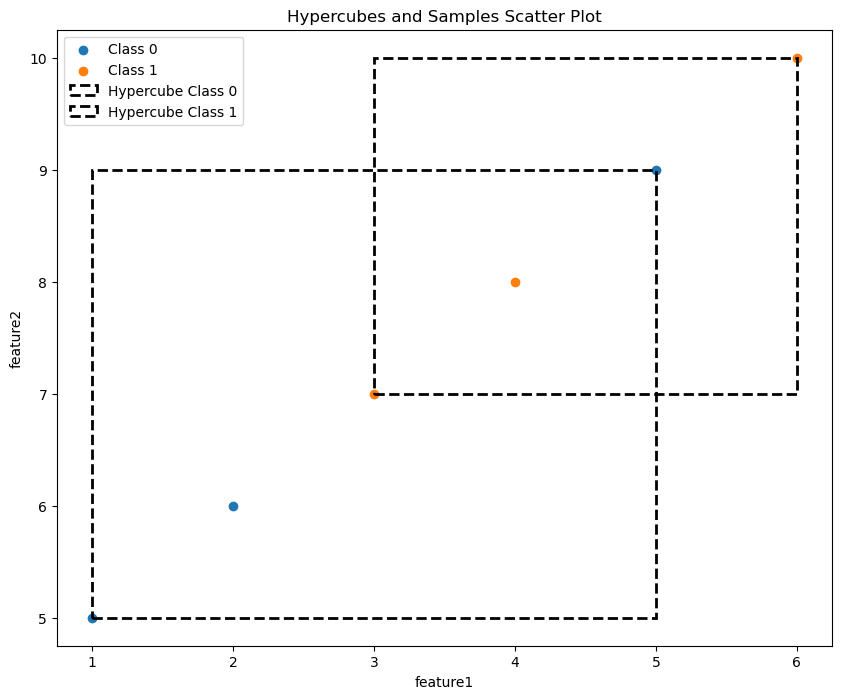

,feature1,feature2,class
0,1,5,0
1,2,6,0
2,3,7,1
3,4,8,1
4,5,9,0
5,6,10,1


In [3]:
import matplotlib.pyplot as plt

def plot_hypercubes_with_samples(df, class_column, feature1, feature2):
    """
    Plot hypercubes as rectangles in a scatter plot with samples.
    
    Parameters:
    df (pd.DataFrame): The input dataframe containing features and class labels.
    class_column (str): The name of the column representing the class labels.
    feature1 (str): The name of the first feature to plot.
    feature2 (str): The name of the second feature to plot.
    """
    # Create hypercubes
    hypercubes = create_hypercube(df, class_column)
    
    # Plot the scatter plot of samples
    plt.figure(figsize=(10, 8))
    for cls in df[class_column].unique():
        class_data = df[df[class_column] == cls]
        plt.scatter(class_data[feature1], class_data[feature2], label=f'Class {cls}')
    
    # Plot the hypercubes as rectangles
    for cls, bounds in hypercubes.items():
        min_vals = bounds['min']
        max_vals = bounds['max']
        
        # Rectangle coordinates
        x_min, x_max = min_vals[feature1], max_vals[feature1]
        y_min, y_max = min_vals[feature2], max_vals[feature2]
        
        # Plot rectangle
        plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                          fill=False, edgecolor='black', linewidth=2, linestyle='--', label=f'Hypercube Class {cls}'))
    
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.title('Hypercubes and Samples Scatter Plot')
    plt.show()

# Example usage
# Assuming `data` is a DataFrame with features and a 'class' column for class labels
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6],
    'feature2': [5, 6, 7, 8, 9, 10],
    'class': [0, 0, 1, 1, 0, 1]
})

plot_hypercubes_with_samples(data, 'class', 'feature1', 'feature2')
data


In [1]:
import pandas as pd
import numpy as np

def calculate_continuous_case_ambiguity(df, class_column):
    """
    Calculate the continuous case ambiguity for an arbitrary number of features and classes.
    
    Parameters:
    df (pd.DataFrame): The input dataframe containing features and class labels.
    class_column (str): The name of the column representing the class labels.
    
    Returns:
    float: The continuous case ambiguity.
    """
    # Extract features and classes
    features = df.columns.drop(class_column)
    classes = df[class_column].unique()
    num_classes = len(classes)
    
    # Calculate min and max for each feature and class
    min_values = df.groupby(class_column)[features].min().values
    max_values = df.groupby(class_column)[features].max().values
    
    # Calculate overlap regions
    min_overlap = np.maximum(min_values[:, np.newaxis, :], min_values[np.newaxis, :, :])
    max_overlap = np.minimum(max_values[:, np.newaxis, :], max_values[np.newaxis, :, :])
    
    # Check for valid overlaps
    valid_overlap = np.all(min_overlap <= max_overlap, axis=2)
    
    # Calculate number of samples in each overlap region
    overlap_conditions = np.all((df[features].values >= min_overlap[:, :, np.newaxis]) &
                                (df[features].values <= max_overlap[:, :, np.newaxis]), axis=3)
    
    class_labels = df[class_column].values
    samples_in_overlap = np.array([np.sum(overlap_conditions[i, j] & (class_labels == classes[i])[:, np.newaxis], axis=1)
                                   for i in range(num_classes) for j in range(i+1, num_classes)]).reshape(num_classes, num_classes - 1, -1)
    
    # Calculate total samples per class
    total_samples_per_class = df[class_column].value_counts().values
    
    # Calculate ambiguity
    ambiguity_values = samples_in_overlap / total_samples_per_class[:, np.newaxis, np.newaxis]
    mean_ambiguity = np.mean(ambiguity_values[valid_overlap], axis=0)
    
    return np.mean(mean_ambiguity)

# Example usage
# Assuming `data` is a DataFrame with features and a 'class' column for class labels
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6],
    'feature2': [5, 6, 7, 8, 9, 10],
    'class': [0, 0, 1, 1, 0, 1]
})

ambiguity = calculate_continuous_case_ambiguity(data, 'class')
print(f'Continuous Case Ambiguity: {ambiguity}')


IndexError: boolean index did not match indexed array along dimension 1; dimension is 1 but corresponding boolean dimension is 2

IndexError: boolean index did not match indexed array along dimension 1; dimension is 1 but corresponding boolean dimension is 2

In [16]:
import pandas as pd
import numpy as np

def calculate_continuous_case_ambiguity(df, class_column):
    """
    Calculate the continuous case ambiguity for an arbitrary number of features and classes.
    
    Parameters:
    df (pd.DataFrame): The input dataframe containing features and class labels.
    class_column (str): The name of the column representing the class labels.
    
    Returns:
    float: The continuous case ambiguity.
    """
    # Extract features and classes
    features = df.columns.drop(class_column)
    classes = df[class_column].unique()
    num_classes = len(classes)
    
    # Calculate min and max for each feature and class
    grouped = df.groupby(class_column)[features]
    min_values = grouped.min().values
    max_values = grouped.max().values
    
    # Calculate overlap regions
    min_overlap = np.maximum(min_values[:, np.newaxis, :], min_values[np.newaxis, :, :])
    max_overlap = np.minimum(max_values[:, np.newaxis, :], max_values[np.newaxis, :, :])
    
    # Check for valid overlaps
    valid_overlap = np.all(min_overlap <= max_overlap, axis=2)
    
    # Calculate number of samples in each overlap region
    samples = df[features].values
    overlap_conditions = np.all(
        (samples[:, np.newaxis, np.newaxis, :] >= min_overlap[np.newaxis, :, :, :]) &
        (samples[:, np.newaxis, np.newaxis, :] <= max_overlap[np.newaxis, :, :, :]),
        axis=3
    )
    
    class_labels = df[class_column].values
    samples_in_overlap = np.zeros((num_classes, num_classes))
    for i in range(num_classes):
        for j in range(num_classes):
            if i != j:
                samples_in_overlap[i, j] = np.sum(overlap_conditions[:, i, j] & (class_labels == classes[i]))
    
    # Calculate total samples per class
    total_samples_per_class = df[class_column].value_counts().values
    
    # Calculate ambiguity
    print(samples_in_overlap)
    ambiguity_values = samples_in_overlap / total_samples_per_class[:, np.newaxis]
    print(ambiguity_values)
    # Filter ambiguity values using the valid overlaps
    valid_ambiguity_values = ambiguity_values[valid_overlap]
    print(valid_ambiguity_values)
    mean_ambiguity = np.mean(valid_ambiguity_values)
    
    return mean_ambiguity

# Example usage
# Assuming `data` is a DataFrame with features and a 'class' column for class labels
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6],
    'feature2': [5, 6, 7, 8, 9, 10],
    'class': [0, 0, 1, 1, 0, 1]
})

ambiguity = calculate_continuous_case_ambiguity(data, 'class')
print(f'Continuous Case Ambiguity: {ambiguity}')

data

[[0. 1.]
 [2. 0.]]
[[0.         0.33333333]
 [0.66666667 0.        ]]
[0.         0.33333333 0.66666667 0.        ]
Continuous Case Ambiguity: 0.25


,feature1,feature2,class
0,1,5,0
1,2,6,0
2,3,7,1
3,4,8,1
4,5,9,0
5,6,10,1
